In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train/255.
x_test = x_test/255.

In [13]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape = (x_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y_train)), activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 128)           80384     
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 213,258
Trainable params: 213,258
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 109s 58ms/step - loss: 0.5142 - accuracy: 0.8353 - val_loss: 0.1192 - val_accuracy: 0.9642
Epoch 2/3
1875/1875 [==============================] - 109s 58ms/step - loss: 0.1279 - accuracy: 0.9637 - val_loss: 0.0757 - val_accuracy: 0.9745
Epoch 3/3
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0884 - accuracy: 0.9749 - val_loss: 0.0833 - val_accuracy: 0.9749


In [15]:
import matplotlib.pyplot as plt

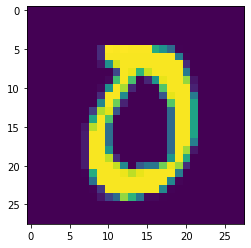

In [28]:
plt.imshow(x_test[28]);

In [30]:
model.predict(x_test[[28,38]]).argmax(axis=-1)

array([0, 2])